In [68]:
%matplotlib inline

import pandas as pd  
import numpy as np  
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [106]:

from sklearn.utils import check_array

def mean_absolute_percentage_error(y_true, y_pred): 
    """
    Use of this metric is not recommended; for illustration only. 
    See other regression metrics on sklearn docs:
      http://scikit-learn.org/stable/modules/classes.html#regression-metrics
    Use like any other metric
    >>> y_true = [3, -0.5, 2, 7]; y_pred = [2.5, -0.3, 2, 8]
    >>> mean_absolute_percentage_error(y_true, y_pred)   Out[]: 24.791666666666668
    """

    #y_true, y_pred = check_array(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


## Data Loading

In [50]:
# data_df = pd.read_csv('data_maruti.csv')
# data_df = data_df[['Date', 'Close']]
# data_df['Date'] = pd.to_datetime(data_df['Date'])
# data_df.head()

In [51]:
data_df = pd.read_csv('monthly-car-sales-in-quebec-1960.csv', nrows = 109)
#data_df['Month'] = pd.to_datetime(data_df['Month'])
data_df['Month'] = data_df['Month'] + '-01'
data_df['Month'] = pd.to_datetime(data_df['Month'])
data_df.tail()

,Month,Monthly car sales in Quebec 1960-1968
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180
107,1968-12-01,14577


In [52]:
#Split data based on date
split_date = pd.datetime(1967, 12 , 1)

train_df = data_df.loc[data_df['Month'] <= split_date]
train_df.tail()


,Month,Monthly car sales in Quebec 1960-1968
91,1967-08-01,13434
92,1967-09-01,13598
93,1967-10-01,17187
94,1967-11-01,16119
95,1967-12-01,13713


In [53]:
test_df = data_df.loc[data_df['Month'] > split_date]
test_df.head()

,Month,Monthly car sales in Quebec 1960-1968
96,1968-01-01,13210
97,1968-02-01,14251
98,1968-03-01,20139
99,1968-04-01,21725
100,1968-05-01,26099


In [54]:
#rename columns as the prophet expects these names
train_df.columns = ['ds', 'y']
test_df.columns = ['ds', 'y']
train_df.tail()

,ds,y
91,1967-08-01,13434
92,1967-09-01,13598
93,1967-10-01,17187
94,1967-11-01,16119
95,1967-12-01,13713


## Plot Data 

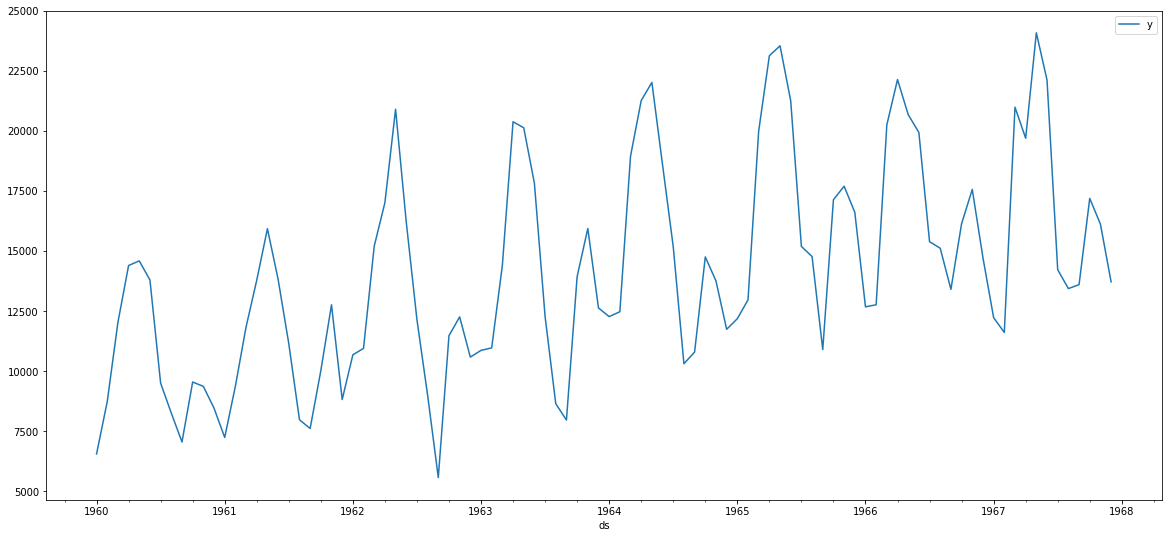

In [55]:
train_df.set_index('ds').plot(figsize=(20, 9))  

## Train and Predict

In [56]:
model = Prophet()  
model.fit(train_df)  

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [57]:
future_data = model.make_future_dataframe(periods= 12, freq = 'M')  
future_data.tail()  

,ds
103,1968-07-31
104,1968-08-31
105,1968-09-30
106,1968-10-31
107,1968-11-30


In [58]:
forecast = model.predict(future_data)  
forecast.columns  

C:\Users\I056036\AppData\Local\Continuum\anaconda3\lib\site-packages\fbprophet\forecaster.py:1010: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = seasonal_features.as_matrix()
C:\Users\I056036\AppData\Local\Continuum\anaconda3\lib\site-packages\fbprophet\forecaster.py:1134: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  seasonal = np.matmul(seasonal_features.as_matrix(), beta) * self.y_scale


Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'seasonal', 'seasonal_lower', 'seasonal_upper', 'seasonalities',
       'seasonalities_lower', 'seasonalities_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'yhat'],
      dtype='object')

In [59]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()  

,ds,yhat,yhat_lower,yhat_upper
103,1968-07-31,14002.037506,12474.929079,15535.795617
104,1968-08-31,12567.683975,11098.603391,14211.302422
105,1968-09-30,17418.749488,15926.604845,18896.038181
106,1968-10-31,18225.346515,16798.384481,19664.232108
107,1968-11-30,15022.449320,13484.038273,16616.977595


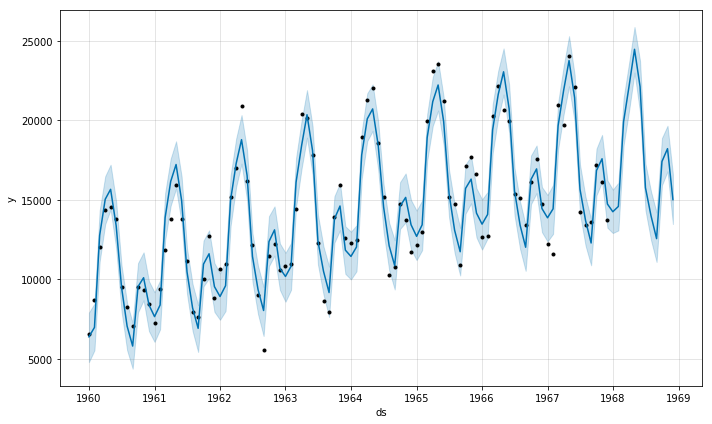

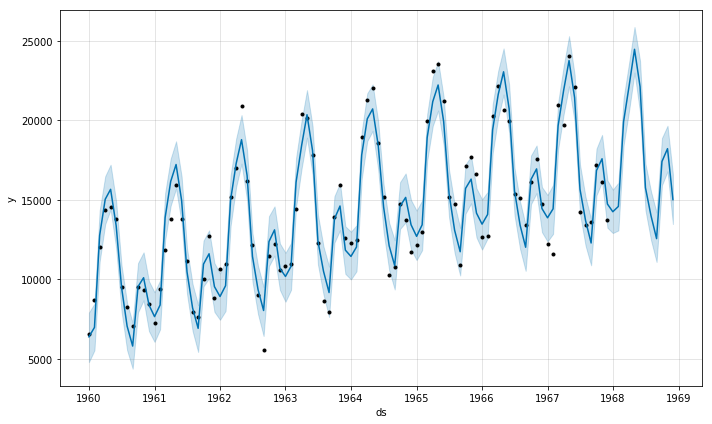

In [60]:
#Plot actual and forcasted values
model.plot(forecast)

C:\Users\I056036\AppData\Local\Continuum\anaconda3\lib\site-packages\fbprophet\forecaster.py:1010: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = seasonal_features.as_matrix()


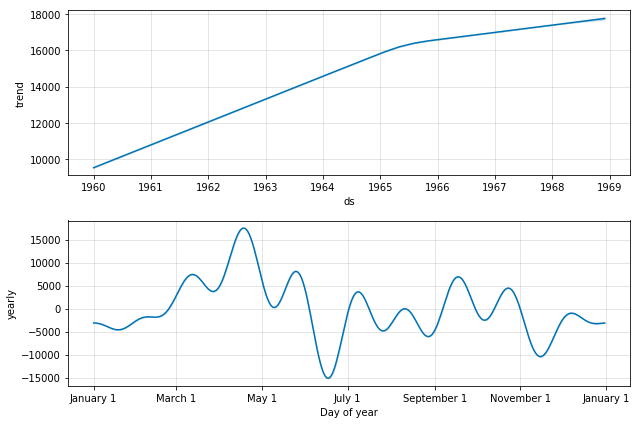

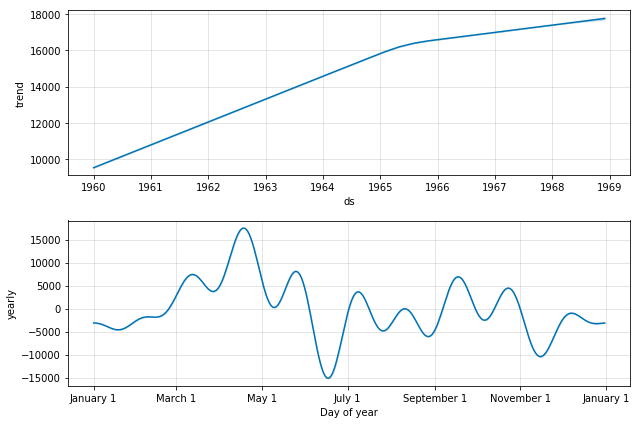

In [61]:
model.plot_components(forecast )

### Predict on test data

In [62]:
test_df.tail()

,ds,y
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180
107,1968-12-01,14577


In [63]:
#Add a noisy data in end
#test_df.loc[len(test_df)] = ['1969-01-01', 30000 ]


In [64]:

pred = model.predict(test_df)  
test_pred = test_df.copy()
test_pred = test_pred.reset_index()
test_pred[[ 'yhat', 'yhat_lower', 'yhat_upper']] = pred[['yhat', 'yhat_lower', 'yhat_upper']]
test_pred.tail()


C:\Users\I056036\AppData\Local\Continuum\anaconda3\lib\site-packages\fbprophet\forecaster.py:1010: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = seasonal_features.as_matrix()
C:\Users\I056036\AppData\Local\Continuum\anaconda3\lib\site-packages\fbprophet\forecaster.py:1134: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  seasonal = np.matmul(seasonal_features.as_matrix(), beta) * self.y_scale


,index,ds,y,yhat,yhat_lower,yhat_upper
7,103,1968-08-01,16722,14448.808236,12829.142840,15986.384690
8,104,1968-09-01,14385,13121.605020,11617.199339,14683.978142
9,105,1968-10-01,21342,16792.964699,15377.589409,18290.829415
10,106,1968-11-01,17180,17275.117699,15847.118620,18872.660610
11,107,1968-12-01,14577,15489.037545,13963.507635,17102.376585


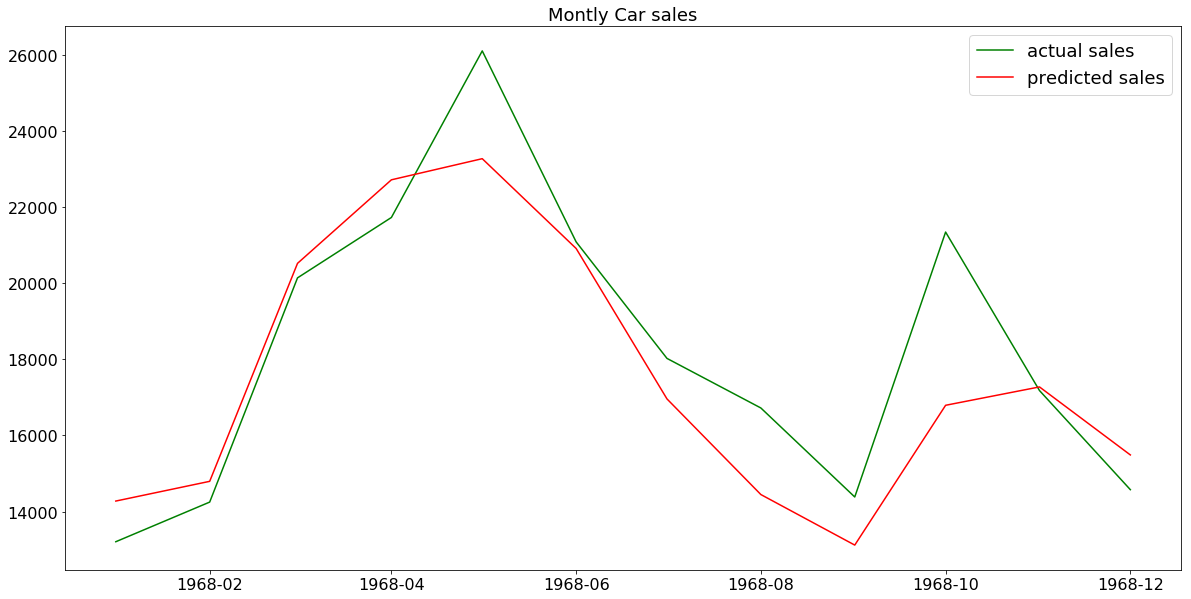

In [65]:

fig = plt.figure(figsize= (20,10))
ax = plt.subplot()
ax.tick_params(labelsize=16)
ax.plot(test_pred['ds'], test_pred['y'],    color='g',  label = 'actual sales')
ax.plot(test_pred['ds'], test_pred['yhat'], color= 'r',   label  = 'predicted sales')
plt.title('Montly Car sales', fontsize = 18 )
ax.legend(loc='upper right', fontsize = 18)
plt.show()

In [120]:
y = np.asarray(test_pred['y'])

print('MAPE Score :', mean_absolute_percentage_error(y, yhat))


MAPE Score : 7.20193123822
